In [9]:
import json
import numpy as np

def check_solution_consistency(results):
    """
    実験結果のリストを受け取り、GurobiとSDPの解が一致しているかを確認する。

    Args:
        results (list): 実験結果が格納されたリスト。
    """
    mismatched_experiments = []

    print("GurobiとSDPの最適価格の一致性を確認します...")
    
    # 各実験結果をループで確認
    for experiment in results:
        exp_num = experiment["number"]
        gurobi_prices = experiment["gurobi_qcqp_result"]["optimal_prices"]
        sdp_prices = experiment["mosek_sdp_result"]["optimal_prices"]

        # どちらかの価格がNoneの場合は比較をスキップ
        if gurobi_prices is None or sdp_prices is None:
            print(f"実験 {exp_num}: 片方もしくは両方の解がNoneのため比較をスキップします。")
            continue

        # np.allclose() を使って、2つの価格ベクトルがほぼ等しいかを確認
        # atolは絶対許容誤差
        if not np.allclose(gurobi_prices, sdp_prices, atol=1e-4):
            mismatched_experiments.append({
                "number": exp_num,
                "gurobi_prices": gurobi_prices,
                "sdp_prices": sdp_prices
            })
    # 結果の報告
    if not mismatched_experiments:
        print("\n✅ 全ての実験でGurobiとSDPの解は一致していました。")
    else:
        print(f"\n⚠️ {len(mismatched_experiments)}件の実験でGurobiとSDPの解が一致しませんでした。")
        for mismatch in mismatched_experiments:
            print("-" * 30)
            print(f"実験番号: {mismatch['number']}")
            print(f"  Gurobi 価格: {np.round(mismatch['gurobi_prices'], 4)}")
            print(f"  SDP 価格   : {np.round(mismatch['sdp_prices'], 4)}")

In [10]:
with open("/Users/mkumachan1355/Pythonspace/price-optimize-SDP/experiment_results_delta0.json", "r") as f:
    results_delta0 = json.load(f)
check_solution_consistency(results_delta0)

GurobiとSDPの最適価格の一致性を確認します...

⚠️ 12件の実験でGurobiとSDPの解が一致しませんでした。
------------------------------
実験番号: 17
  Gurobi 価格: [0.7398 0.9449 0.8405 0.7084 1.2689 1.1967 1.1709 1.1251 0.7045 1.1443
 1.0239 0.7741 1.3917 1.0063 0.7169 1.0068 1.034  0.9657 0.9645 0.874 ]
  SDP 価格   : [0.74   0.945  0.8407 0.7085 1.2691 1.1969 1.1711 1.1253 0.7046 1.1445
 1.0241 0.7742 1.3918 1.0064 0.7171 1.007  1.0341 0.9658 0.9647 0.8742]
------------------------------
実験番号: 22
  Gurobi 価格: [0.974  0.742  0.792  0.9739 0.9391 0.7281 0.9466 0.8972 0.793  0.926
 0.6049 1.0043 0.8509 1.0014 0.9822 0.6317 0.9924 1.176  1.1788 0.6682]
  SDP 価格   : [0.9742 0.742  0.7921 0.974  0.9392 0.7282 0.9467 0.8973 0.7931 0.9261
 0.6049 1.0044 0.851  1.0015 0.9824 0.6317 0.9925 1.1762 1.1789 0.6683]
------------------------------
実験番号: 23
  Gurobi 価格: [1.0219 1.2162 1.1702 0.6849 0.6687 0.9024 0.6974 0.8409 1.063  0.7105
 0.937  0.9188 1.1988 0.8875 0.7414 1.0761 0.9895 0.5979 0.9474 0.6729]
  SDP 価格   : [1.0218 1.2161 1.1701 0.

In [60]:
with open("/Users/mkumachan1355/Pythonspace/price-optimize-SDP/experiment_results_delta25.json", "r") as f:
    results_delta0 = json.load(f)
check_solution_consistency(results_delta0)

GurobiとSDPの最適価格の一致性を確認します...

⚠️ 21件の実験でGurobiとSDPの解が一致しませんでした。
------------------------------
実験番号: 0
  Gurobi 価格: [1.4902 0.9909 1.1565 1.0627 1.0721 1.0323 0.7648 1.0682 1.0637 1.1351
 1.2066 0.8891 1.04   0.8124 0.9463 1.2039 0.8318 1.2271 1.0496 1.0164]
  SDP 価格   : [1.4901 0.9909 1.1565 1.0627 1.0722 1.0323 0.7649 1.0682 1.0637 1.1351
 1.2066 0.8892 1.04   0.8124 0.9465 1.204  0.8319 1.227  1.0496 1.0164]
------------------------------
実験番号: 1
  Gurobi 価格: [1.2879 0.9123 0.7201 0.9102 1.0048 0.7685 0.6056 0.8828 0.719  1.4556
 0.9369 1.3318 0.9262 1.4142 0.6457 0.9195 1.018  1.0514 0.6346 1.1687]
  SDP 価格   : [1.2879 0.9122 0.7201 0.9101 1.0047 0.7685 0.6055 0.8827 0.7189 1.4556
 0.9369 1.3319 0.9261 1.4142 0.6456 0.9194 1.018  1.0514 0.6345 1.1687]
------------------------------
実験番号: 8
  Gurobi 価格: [0.8088 1.3096 1.0364 0.9318 0.9055 0.6147 0.779  0.6789 0.7078 0.8591
 0.9913 1.032  1.0514 0.9419 0.8923 0.7558 0.8707 1.0732 0.6295 0.4729]
  SDP 価格   : [0.8087 1.3095 1.0364 0.93

In [61]:
with open("/Users/mkumachan1355/Pythonspace/price-optimize-SDP/experiment_results_delta50.json", "r") as f:
    results_delta0 = json.load(f)
check_solution_consistency(results_delta0)

GurobiとSDPの最適価格の一致性を確認します...

⚠️ 39件の実験でGurobiとSDPの解が一致しませんでした。
------------------------------
実験番号: 0
  Gurobi 価格: [1.4971 0.9635 1.1863 0.9887 1.101  0.9579 0.6548 1.0372 0.8684 1.1063
 1.2899 0.6531 1.0251 0.6386 1.0183 1.3413 0.9157 1.0589 1.0122 0.8817]
  SDP 価格   : [1.4971 0.9636 1.1864 0.9891 1.101  0.9581 0.6547 1.0369 0.8685 1.106
 1.2899 0.6532 1.0251 0.6384 1.0184 1.3412 0.9159 1.0586 1.0124 0.8819]
------------------------------
実験番号: 1
  Gurobi 価格: [1.2358 0.7377 0.6585 0.9304 0.9538 0.7228 0.561  0.8535 0.5536 1.4272
 0.9919 1.1628 0.8972 1.4994 0.6414 0.9279 0.8986 0.9891 0.5023 1.2274]
  SDP 価格   : [1.2358 0.7376 0.6585 0.9304 0.9538 0.7228 0.5609 0.8535 0.5535 1.4272
 0.9919 1.1628 0.8971 1.4994 0.6414 0.9279 0.8985 0.989  0.5023 1.2274]
------------------------------
実験番号: 6
  Gurobi 価格: [0.9401 0.6794 1.2415 0.5027 0.7702 0.5331 1.0345 0.9927 1.1512 0.8181
 0.7036 1.0733 1.2497 1.0639 1.0887 1.051  1.4439 0.438  1.1431 0.9704]
  SDP 価格   : [0.9402 0.6793 1.2414 0.502

In [62]:
with open("/Users/mkumachan1355/Pythonspace/price-optimize-SDP/experiment_results_delta75.json", "r") as f:
    results_delta0 = json.load(f)
check_solution_consistency(results_delta0)

GurobiとSDPの最適価格の一致性を確認します...

⚠️ 18件の実験でGurobiとSDPの解が一致しませんでした。
------------------------------
実験番号: 19
  Gurobi 価格: [1.1592 1.0118 1.3771 0.7027 1.273  0.9162 0.8519 1.1764 1.3152 0.8148
 0.9192 1.0909 1.2066 0.7964 1.0429 1.216  0.9473 0.9522 0.6845 1.0863]
  SDP 価格   : [1.1591 1.0118 1.377  0.7029 1.273  0.9162 0.8519 1.1766 1.3151 0.8149
 0.9192 1.091  1.2067 0.7964 1.0428 1.216  0.9475 0.9523 0.6845 1.0863]
------------------------------
実験番号: 25
  Gurobi 価格: [0.5313 1.2498 1.1164 0.7724 0.9475 0.6098 0.6277 0.5722 0.9914 0.6185
 1.1444 0.9578 1.0091 1.0121 1.0238 1.6894 0.6675 0.8543 1.0837 1.0029]
  SDP 価格   : [0.5314 1.2498 1.1164 0.7725 0.9475 0.6097 0.6277 0.5721 0.9913 0.6185
 1.1443 0.9578 1.009  1.012  1.0238 1.6895 0.6675 0.8542 1.0836 1.003 ]
------------------------------
実験番号: 28
  Gurobi 価格: [0.8324 0.7588 0.7391 1.2234 1.0104 1.0522 0.6161 1.324  1.151  0.621
 1.235  0.8258 0.9201 0.5641 1.3466 1.1267 0.8967 0.6526 1.2493 0.4199]
  SDP 価格   : [0.8323 0.7588 0.739  1.

In [63]:
with open("/Users/mkumachan1355/Pythonspace/price-optimize-SDP/experiment_results_delta100.json", "r") as f:
    results_delta0 = json.load(f)
check_solution_consistency(results_delta0)

GurobiとSDPの最適価格の一致性を確認します...

⚠️ 1件の実験でGurobiとSDPの解が一致しませんでした。
------------------------------
実験番号: 39
  Gurobi 価格: [0.8996 0.9754 0.8175 1.0631 0.9733 0.9018 0.     1.1444 1.0225 0.6491
 1.4876 0.92   0.8989 0.9767 0.4727 1.1452 1.0341 0.784  0.7633 0.7127]
  SDP 価格   : [ 0.8994  0.9751  0.8174  1.0623  0.9719  0.9014 -0.0053  1.1432  1.0227
  0.6501  1.4858  0.9194  0.8984  0.9755  0.4747  1.143   1.033   0.7835
  0.7624  0.7124]


In [13]:
import json
import numpy as np
import pandas as pd

def check_solution_consistency_with_table(results):
    """
    実験結果のリストを受け取り、GurobiとSDPの解が一致しているかを確認する。
    不一致の結果はpandas DataFrameを使って表形式で表示する。

    Args:
        results (list): 実験結果が格納されたリスト。
    """
    mismatched_experiments = []

    print("GurobiとSDPの最適価格の一致性を確認します...")
    
    # 各実験結果をループで確認
    for experiment in results:
        exp_num = experiment["number"]
        gurobi_prices = experiment["gurobi_qcqp_result"]["optimal_prices"]
        sdp_prices = experiment["mosek_sdp_result"]["optimal_prices"]

        if gurobi_prices is None or sdp_prices is None:
            continue

        if not np.allclose(gurobi_prices, sdp_prices, atol=1e-3):
            mismatched_experiments.append(experiment)

    # --- 結果の報告 ---
    if not mismatched_experiments:
        print("\n✅ 全ての実験でGurobiとSDPの解は一致していました。")
    else:
        print(f"\n⚠️ {len(mismatched_experiments)}件の実験でGurobiとSDPの解が一致しませんでした。")
        
        # 表形式で表示するためのデータを作成
        table_data = []
        for experiment in mismatched_experiments:
            gurobi_p = np.array(experiment["gurobi_qcqp_result"]["optimal_prices"])
            sdp_p = np.array(experiment["mosek_sdp_result"]["optimal_prices"])
            
            # 2つの価格ベクトルの差を計算
            price_diff = gurobi_p - sdp_p
            l2_norm_diff = np.linalg.norm(price_diff) # L2ノルム（ユークリッド距離）
            max_abs_diff = np.max(np.abs(price_diff)) # 最大絶対差
            
            table_data.append({
                "実験番号": experiment["number"],
                "Gurobi収益": experiment["gurobi_qcqp_result"]["evaluated_revenue"],
                "SDP収益": experiment["mosek_sdp_result"]["evaluated_revenue"],
                "価格差(L2ノルム)": f"{l2_norm_diff:.4e}", # 指数表記
                "価格差(最大絶対値)": f"{max_abs_diff:.4e}"  # 指数表記
            })
            
        # pandas DataFrameを作成して表示
        df = pd.DataFrame(table_data)
        
        # DataFrameの表示設定（オプション）
        pd.set_option('display.float_format', '{:.4f}'.format) # 小数点4桁まで表示
        pd.set_option('display.max_rows', None) # 全ての行を表示
        pd.set_option('display.width', 100) # 表示幅を広げる

        print("\n--- 不一致だった実験の詳細 ---")
        # index=False で、DataFrameのインデックス（行番号）を非表示にする
        print(df.to_string(index=False))


# --- 関数の実行例 ---
if __name__ == '__main__':
    try:
        # 実験の全結果ファイルを読み込む
        with open("experiment_results_delta0.json", "r") as f:
            all_results = json.load(f)
        
        # 新しい関数を実行
        check_solution_consistency_with_table(all_results)

    except FileNotFoundError:
        print("エラー: 'experiment_results_delta0.json' が見つかりません。")
        print("先に最初の実験コードを実行して、結果ファイルを生成してください。")
    except Exception as e:
        print(f"処理中にエラーが発生しました: {e}")

GurobiとSDPの最適価格の一致性を確認します...

✅ 全ての実験でGurobiとSDPの解は一致していました。


In [14]:
import json
import csv

def extract_true_beta_to_csv(json_file_path, target_i, csv_file_path):
  """
  指定されたJSONファイルから特定のiに対応するtrue_betaを抽出し、CSVファイルに出力します。

  Args:
      json_file_path (str): 読み込むJSONファイルのパス。
      target_i (int): 検索対象のiの値（'number'キーに対応）。
      csv_file_path (str): 出力するCSVファイルのパス。
  """
  try:
    # JSONファイルを読み込む
    with open(json_file_path, 'r', encoding='utf-8') as f:
      data_list = json.load(f)

    # 該当するiのデータを検索
    target_data = None
    # データがリスト形式であることを想定してループ処理
    if isinstance(data_list, list):
      for item in data_list:
        if item.get("number") == target_i:
          target_data = item
          break
    # データが単一の辞書の場合も考慮
    elif isinstance(data_list, dict):
      if data_list.get("number") == target_i:
        target_data = data_list

    if target_data:
      true_beta = target_data.get("true_beta")
      if true_beta is not None and isinstance(true_beta, list):
        # CSVファイルに書き出す
        with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
          writer = csv.writer(csvfile)
          writer.writerow(true_beta)
        print(f"完了: i={target_i} の true_beta を {csv_file_path} に出力しました。")
      else:
        print(f"エラー: i={target_i} のデータに 'true_beta' が見つからないか、リスト形式ではありません。")
    else:
      print(f"エラー: i={target_i} に対応するデータがJSONファイル内に見つかりませんでした。")

  except FileNotFoundError:
    print(f"エラー: ファイル '{json_file_path}' が見つかりません。")
  except json.JSONDecodeError:
    print(f"エラー: ファイル '{json_file_path}' は有効なJSON形式ではありません。")
  except Exception as e:
    print(f"予期せぬエラーが発生しました: {e}")

In [15]:
with open("/Users/mkumachan1355/Pythonspace/price-optimize-SDP/experiment_results_delta0.json", "r") as f:
    results_delta0 = json.load(f)
extract_true_beta_to_csv(results_delta0, target_i=1, csv_file_path="true_beta_experiment_1.csv")

予期せぬエラーが発生しました: unhashable type: 'list'


In [16]:
import json
import csv

def extract_true_beta_to_csv(json_file_path, target_i, csv_file_path):
  """
  指定されたJSONファイルから特定のiに対応するtrue_betaを抽出し、
  CSVファイルに出力します。
  """
  try:
    with open(json_file_path, 'r', encoding='utf-8') as f:
      data_list = json.load(f)

    target_data = None
    if isinstance(data_list, list):
      for item in data_list:
        if item.get("number") == target_i:
          target_data = item
          break
    elif isinstance(data_list, dict):
      if data_list.get("number") == target_i:
        target_data = data_list

    if target_data:
      true_beta = target_data.get("true_beta")
      if true_beta is not None and isinstance(true_beta, list):
        with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
          writer = csv.writer(csvfile)
          # true_betaはリストのリストなので、writerowsで複数行に書き出す
          writer.writerows(true_beta)
        print(f"👍 完了: number={target_i} の true_beta を {csv_file_path} に出力しました。")
      else:
        print(f"エラー: number={target_i} のデータに 'true_beta' が見つからないか、リスト形式ではありません。")
    else:
      print(f"エラー: number={target_i} に対応するデータが見つかりませんでした。")

  except FileNotFoundError:
    print(f"エラー: ファイル '{json_file_path}' が見つかりません。")
  except Exception as e:
    print(f"予期せぬエラーが発生しました: {e}")

# --- ここから実行 ---
# 読み込むJSONファイル
json_file = "experiment_results.json"

# 抽出したいnumberと出力先のCSVファイル名
target_number = 2
output_csv = "beta_output_for_2.csv"

# 関数を実行
extract_true_beta_to_csv(json_file, target_number, output_csv)

👍 完了: number=2 の true_beta を beta_output_for_2.csv に出力しました。


In [18]:
# ファイルパスを直接渡す
json_filepath = "/Users/mkumachan1355/Pythonspace/price-optimize-SDP/experiment_results_delta0.json"
extract_true_beta_to_csv(json_filepath, target_i=1, csv_file_path="true_beta_experiment_1.csv")

👍 完了: number=1 の true_beta を true_beta_experiment_1.csv に出力しました。


In [19]:
import json
import numpy as np
import pandas as pd

def check_revenue_consistency(results):
    """
    実験結果のリストを受け取り、GurobiとSDPの推定最適収益が一致しているかを確認する。
    不一致の結果はpandas DataFrameを使って表形式で表示する。

    Args:
        results (list): 実験結果が格納されたリスト。
    """
    mismatched_experiments = []

    print("GurobiとSDPの推定最適収益 (optimal_revenue) の一致性を確認します...")

    # 各実験結果をループで確認
    for experiment in results:
        gurobi_rev = experiment["gurobi_qcqp_result"]["optimal_revenue"]
        sdp_rev = experiment["mosek_sdp_result"]["optimal_revenue"]

        # 収益がNoneの場合は比較をスキップ
        if gurobi_rev is None or sdp_rev is None:
            continue

        # np.isclose() を使って、2つの収益がほぼ等しいかを確認
        if not np.isclose(gurobi_rev, sdp_rev):
            mismatched_experiments.append(experiment)

    # --- 結果の報告 ---
    if not mismatched_experiments:
        print("\n✅ 全ての実験でGurobiとSDPの推定最適収益は一致していました。")
    else:
        print(f"\n⚠️ {len(mismatched_experiments)}件の実験で推定最適収益が一致しませんでした。")

        # 表形式で表示するためのデータを作成
        table_data = []
        for exp in mismatched_experiments:
            gurobi_revenue = exp["gurobi_qcqp_result"]["optimal_revenue"]
            sdp_revenue = exp["mosek_sdp_result"]["optimal_revenue"]
            
            table_data.append({
                "実験番号": exp["number"],
                "Gurobi推定収益": gurobi_revenue,
                "SDP推定収益": sdp_revenue,
                "収益差": abs(gurobi_revenue - sdp_revenue)
            })

        # pandas DataFrameを作成して表示
        df = pd.DataFrame(table_data)
        pd.set_option('display.float_format', '{:.4f}'.format)

        print("\n--- 推定収益が不一致だった実験の詳細 ---")
        print(df.to_string(index=False))


# --- 関数の実行例 ---
if __name__ == '__main__':
    try:
        # 実験の全結果ファイルを読み込む
        with open("experiment_results_delta0.json", "r") as f:
            all_results = json.load(f)
        
        # 関数を実行して収益の一致性を確認
        check_revenue_consistency(all_results)

    except FileNotFoundError:
        print("エラー: 'experiment_results_delta0.json' が見つかりません。")
        print("先に最初の実験コードを実行して、結果ファイルを生成してください。")
    except Exception as e:
        print(f"処理中にエラーが発生しました: {e}")

GurobiとSDPの推定最適収益 (optimal_revenue) の一致性を確認します...

✅ 全ての実験でGurobiとSDPの推定最適収益は一致していました。


In [23]:
import json
import pandas as pd

def export_solutions_to_csv(results, experiment_number):
    """
    指定された実験番号のGurobiとSDPの解をCSVファイルに出力する。

    Args:
        results (list): 実験結果が格納されたリスト。
        experiment_number (int): CSVに出力したい実験の番号。
    """
    # 指定された実験番号のデータを検索
    experiment = next((item for item in results if item['number'] == experiment_number), None)

    if experiment is None:
        print(f"エラー: 実験番号 {experiment_number} が見つかりませんでした。")
        return

    # GurobiとSDPの価格データを抽出
    gurobi_prices = experiment["gurobi_qcqp_result"]["optimal_prices"]
    sdp_prices = experiment["mosek_sdp_result"]["optimal_prices"]

    if gurobi_prices is None or sdp_prices is None:
        print(f"エラー: 実験番号 {experiment_number} の解のどちらかがNoneのため、ファイルを作成できません。")
        return

    # pandas DataFrameを作成
    # 辞書のキーがCSVの列名になる
    df = pd.DataFrame({
        'gurobi_price': gurobi_prices,
        'sdp_price': sdp_prices
    })

    # ファイル名を定義
    filename = f"solution_details_exp_{experiment_number}.csv"
    
    # CSVファイルとして保存
    # index_label='product_index' を指定して、行インデックスに名前を付ける
    df.to_csv(filename, index_label='product_index', float_format='%.8f')

    print(f"\n✅ 実験番号 {experiment_number} の解を '{filename}' に出力しました。")



In [27]:
with open("experiment_results_delta0.json", "r") as f:
    all_results = json.load(f)

# 抽出したいnumberと出力先のCSVファイル名
target_number = 17
output_csv = "delta0price17.csv"

# 関数を実行
export_solutions_to_csv(all_results, target_number)


✅ 実験番号 17 の解を 'solution_details_exp_17.csv' に出力しました。


In [28]:
with open("experiment_results_delta0.json", "r") as f:
    all_results = json.load(f)

# 抽出したいnumberと出力先のCSVファイル名
target_number = 22
output_csv = "delta0price17.csv"

# 関数を実行
export_solutions_to_csv(all_results, target_number)


✅ 実験番号 22 の解を 'solution_details_exp_22.csv' に出力しました。


In [64]:
with open("experiment_results_delta0.json", "r") as f:
    all_results = json.load(f)

# 抽出したいnumberと出力先のCSVファイル名
target_number = 50
output_csv = "delta0price50.csv"

# 関数を実行
export_solutions_to_csv(all_results, target_number)


✅ 実験番号 50 の解を 'solution_details_exp_50.csv' に出力しました。


In [29]:
with open("experiment_results_delta0.json", "r") as f:
     all_results = json.load(f)
        
        # 関数を実行して収益の一致性を確認
check_revenue_consistency(all_results)

GurobiとSDPの推定最適収益 (optimal_revenue) の一致性を確認します...

✅ 全ての実験でGurobiとSDPの推定最適収益は一致していました。


In [30]:
with open("experiment_results_delta25.json", "r") as f:
     all_results = json.load(f)
        
        # 関数を実行して収益の一致性を確認
check_revenue_consistency(all_results)

GurobiとSDPの推定最適収益 (optimal_revenue) の一致性を確認します...

✅ 全ての実験でGurobiとSDPの推定最適収益は一致していました。


In [31]:
with open("experiment_results_delta50.json", "r") as f:
     all_results = json.load(f)
        
        # 関数を実行して収益の一致性を確認
check_revenue_consistency(all_results)

GurobiとSDPの推定最適収益 (optimal_revenue) の一致性を確認します...

✅ 全ての実験でGurobiとSDPの推定最適収益は一致していました。


In [32]:
with open("experiment_results_delta75.json", "r") as f:
     all_results = json.load(f)
        
        # 関数を実行して収益の一致性を確認
check_revenue_consistency(all_results)

GurobiとSDPの推定最適収益 (optimal_revenue) の一致性を確認します...

✅ 全ての実験でGurobiとSDPの推定最適収益は一致していました。


In [33]:
with open("experiment_results_delta100.json", "r") as f:
     all_results = json.load(f)
        
        # 関数を実行して収益の一致性を確認
check_revenue_consistency(all_results)

GurobiとSDPの推定最適収益 (optimal_revenue) の一致性を確認します...

✅ 全ての実験でGurobiとSDPの推定最適収益は一致していました。


In [34]:
import json
import numpy as np
from typing import Tuple, Dict

def summarize_runtimes(json_filepath: str) -> Dict[str, Dict[str, float]]:
    """
    JSON ファイルから実験結果を読み込み、
    - gurobi_qcqp_result.runtime
    - mosek_sdp_result.runtime
    の平均値と標準誤差（標本標準偏差 / sqrt(n)）を返す。

    Parameters
    ----------
    json_filepath : str
        実験結果を保存した JSON ファイルのパス

    Returns
    -------
    Dict[str, Dict[str, float]]
        {
            "gurobi": {"mean": ..., "stderr": ...},
            "sdp":    {"mean": ..., "stderr": ...}
        }
    """
    # JSON の読み込み
    with open(json_filepath, 'r') as f:
        data = json.load(f)

    # ランタイムを抽出（None は除外）
    gurobi_rts = [
        exp["gurobi_qcqp_result"]["runtime"]
        for exp in data
        if exp.get("gurobi_qcqp_result", {}).get("runtime") is not None
    ]
    sdp_rts = [
        exp["mosek_sdp_result"]["runtime"]
        for exp in data
        if exp.get("mosek_sdp_result", {}).get("runtime") is not None
    ]

    # 配列に変換
    gurobi_arr = np.array(gurobi_rts, dtype=float)
    sdp_arr    = np.array(sdp_rts, dtype=float)

    # サンプル数
    n_gurobi = gurobi_arr.size
    n_sdp    = sdp_arr.size

    if n_gurobi == 0 or n_sdp == 0:
        raise ValueError("ランタイムデータが取得できませんでした。ファイル内容を確認してください。")

    # 平均と標準誤差を計算
    results = {
        "gurobi": {
            "mean":   float(np.mean(gurobi_arr)),
            "stderr": float(np.std(gurobi_arr, ddof=1) / np.sqrt(n_gurobi)),
        },
        "sdp": {
            "mean":   float(np.mean(sdp_arr)),
            "stderr": float(np.std(sdp_arr, ddof=1) / np.sqrt(n_sdp)),
        }
    }

    return results


summary = summarize_runtimes("experiment_results_delta0.json")



In [35]:
summary

{'gurobi': {'mean': 0.0004305267333984375, 'stderr': 2.4336926174602894e-05},
 'sdp': {'mean': 0.0022351670265197752, 'stderr': 3.976227504368114e-05}}

In [38]:
summary_list = []
summary_0 = summarize_runtimes("experiment_results_delta0.json")
summary_list.append(summary_0)
summary_25 = summarize_runtimes("experiment_results_delta25.json")
summary_list.append(summary_25)
summary_50 = summarize_runtimes("experiment_results_delta50.json")
summary_list.append(summary_50)
summary_75 = summarize_runtimes("experiment_results_delta75.json")
summary_list.append(summary_75)
summary_100 = summarize_runtimes("experiment_results_delta100.json")
summary_list.append(summary_100)

In [39]:
summary_list

[{'gurobi': {'mean': 0.0004305267333984375, 'stderr': 2.4336926174602894e-05},
  'sdp': {'mean': 0.0022351670265197752, 'stderr': 3.976227504368114e-05}},
 {'gurobi': {'mean': 0.00041022777557373044, 'stderr': 1.229063304180785e-05},
  'sdp': {'mean': 0.0024190330505371093, 'stderr': 7.18794675453662e-05}},
 {'gurobi': {'mean': 5.400737998485565, 'stderr': 1.725809292979203},
  'sdp': {'mean': 0.002626657485961914, 'stderr': 3.201996888021485e-05}},
 {'gurobi': {'mean': 42.002050869464874, 'stderr': 2.76350192489076},
  'sdp': {'mean': 0.0024575042724609376, 'stderr': 3.734873855442875e-05}},
 {'gurobi': {'mean': 60.002446031570436, 'stderr': 0.0001282267758458317},
  'sdp': {'mean': 0.002277567386627197, 'stderr': 2.3838849478744882e-05}}]

Gurobi QCQP runtime:
  平均     : 0.0004 秒
  標準誤差 : 0.0000 秒
MOSEK SDP runtime:
  平均     : 0.0022 秒
  標準誤差 : 0.0000 秒
----------------------------------------
Gurobi QCQP runtime:
  平均     : 0.0004 秒
  標準誤差 : 0.0000 秒
MOSEK SDP runtime:
  平均     : 0.0024 秒
  標準誤差 : 0.0001 秒
----------------------------------------
Gurobi QCQP runtime:
  平均     : 5.4007 秒
  標準誤差 : 1.7258 秒
MOSEK SDP runtime:
  平均     : 0.0026 秒
  標準誤差 : 0.0000 秒
----------------------------------------
Gurobi QCQP runtime:
  平均     : 42.0021 秒
  標準誤差 : 2.7635 秒
MOSEK SDP runtime:
  平均     : 0.0025 秒
  標準誤差 : 0.0000 秒
----------------------------------------
Gurobi QCQP runtime:
  平均     : 60.0024 秒
  標準誤差 : 0.0001 秒
MOSEK SDP runtime:
  平均     : 0.0023 秒
  標準誤差 : 0.0000 秒
----------------------------------------


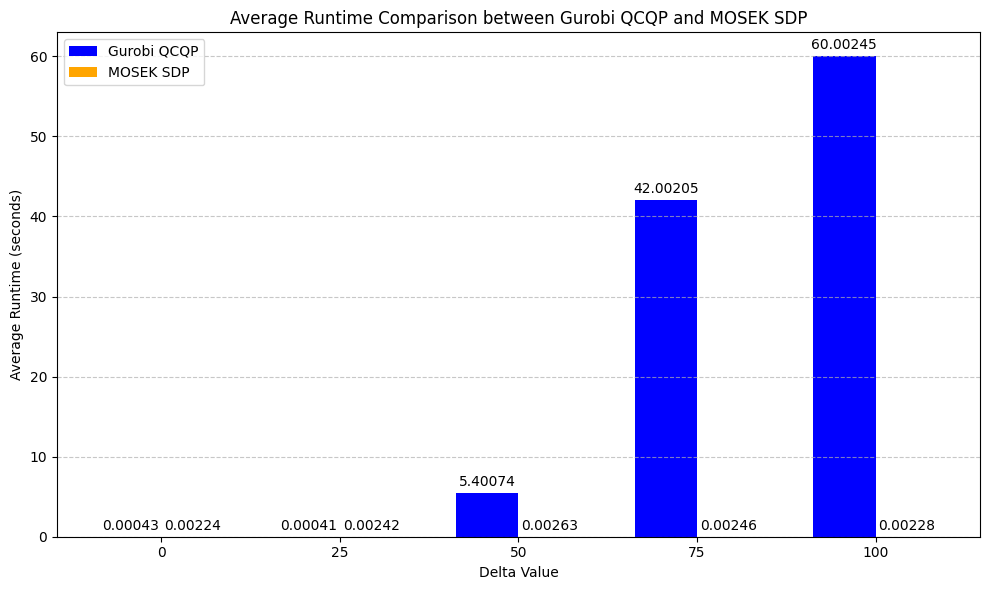

In [ ]:
time_QCQP = []
time_SDP = []
for summary in summary_list:
    print("Gurobi QCQP runtime:")
    print(f"  平均     : {summary['gurobi']['mean']:.4f} 秒")
    print(f"  標準誤差 : {summary['gurobi']['stderr']:.4f} 秒")
    print("MOSEK SDP runtime:")
    print(f"  平均     : {summary['sdp']['mean']:.4f} 秒")
    print(f"  標準誤差 : {summary['sdp']['stderr']:.4f} 秒")
    print("-" * 40)
    time_QCQP.append((summary['gurobi']['mean']), (summary['gurobi']['stderr']))
    time_SDP.append((summary['sdp']['mean'], summary['sdp']['stderr']))
import matplotlib.pyplot as plt
# グラフの設定
x_labels = ['0', '25', '50', '75', '100']
x = np.arange(len(x_labels))  # x軸の位置
width = 0.35  # バーの幅
# グラフの描画(折れ線グラフ)

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, time_QCQP, width, label='Gurobi QCQP', color='blue')
bars2 = ax.bar(x + width/2, time_SDP, width, label='MOSEK SDP', color='orange')
# 軸の設定
ax.set_xlabel('Delta Value')
ax.set_ylabel('Average Runtime (seconds)')
ax.set_title('Average Runtime Comparison between Gurobi QCQP and MOSEK SDP')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
# グリッドの追加
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
# バーの上に値を表示
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.5f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 位置調整
                textcoords="offset points",
                ha='center', va='bottom')
# グラフの表示
plt.tight_layout()
plt.show()

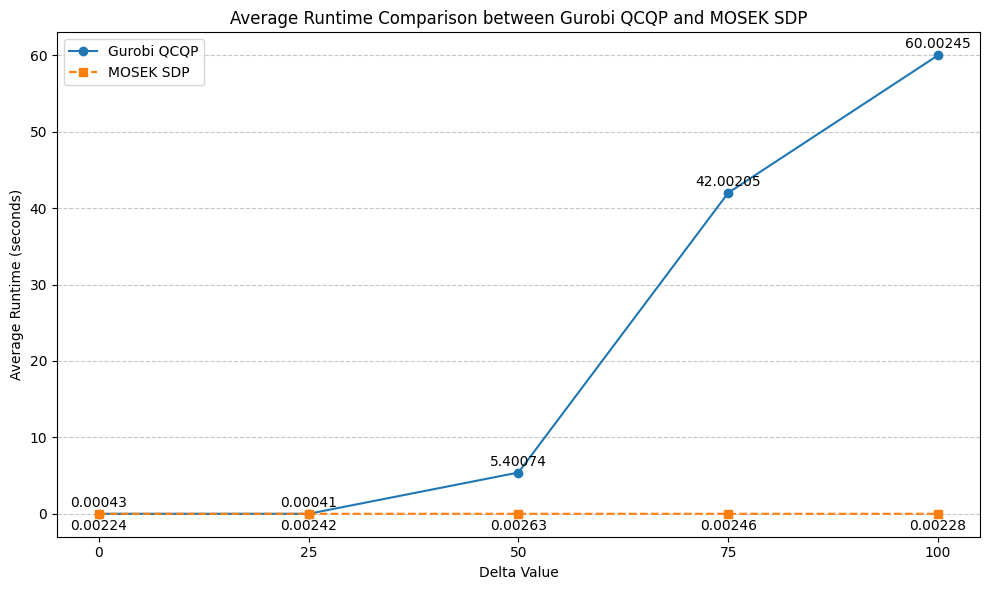

In [43]:
import numpy as np
import matplotlib.pyplot as plt


# グラフの設定
x_labels = ['0', '25', '50', '75', '100']
x = np.arange(len(x_labels))  # x軸の位置

fig, ax = plt.subplots(figsize=(10, 6))

# 折れ線グラフの描画
ax.plot(x, time_QCQP, marker='o', linestyle='-', label='Gurobi QCQP')
ax.plot(x, time_SDP,   marker='s', linestyle='--', label='MOSEK SDP')

# 軸・タイトル設定
ax.set_xlabel('Delta Value')
ax.set_ylabel('Average Runtime (seconds)')
ax.set_title('Average Runtime Comparison between Gurobi QCQP and MOSEK SDP')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# グリッドの追加
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 各点に値を表示
for xi, y in zip(x, time_QCQP):
    ax.annotate(f'{y:.5f}',
                xy=(xi, y),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center')
for xi, y in zip(x, time_SDP):
    ax.annotate(f'{y:.5f}',
                xy=(xi, y),
                xytext=(0, -12),
                textcoords='offset points',
                ha='center')

plt.tight_layout()
plt.show()


In [44]:
# summary_list は [{'gurobi': {'mean':…, 'stderr':…}, 'sdp': {'mean':…, 'stderr':…}}, …] のリストと仮定

# Gurobi QCQP の平均・標準誤差
means_QCQP  = [s['gurobi']['mean']   for s in summary_list]
stderr_QCQP = [s['gurobi']['stderr'] for s in summary_list]

# MOSEK SDP の平均・標準誤差
means_SDP   = [s['sdp']['mean']      for s in summary_list]
stderr_SDP  = [s['sdp']['stderr']    for s in summary_list]


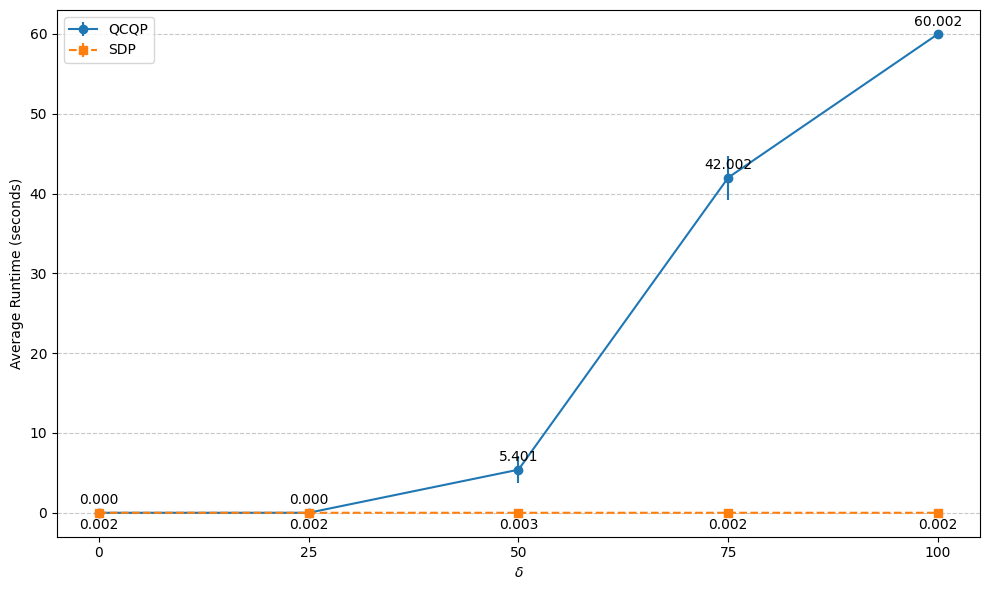

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# x軸ラベルと位置
x_labels = ['0', '25', '50', '75', '100']
x = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(10, 6))

# Gurobi QCQP
ax.errorbar(
    x, means_QCQP, yerr=stderr_QCQP,
    marker='o', linestyle='-',
    label='QCQP'
)

# MOSEK SDP
ax.errorbar(
    x, means_SDP, yerr=stderr_SDP,
    marker='s', linestyle='--',
    label='SDP'
)

# 軸やタイトル
ax.set_xlabel(r'$\delta$')
ax.set_ylabel('Average Runtime (seconds)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# グリッド
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 各点に数値ラベル（必要なら）
for xi, y in zip(x, means_QCQP):
    ax.annotate(f'{y:.3f}',
                xy=(xi, y),
                xytext=(0, 6),
                textcoords='offset points',
                ha='center')
for xi, y in zip(x, means_SDP):
    ax.annotate(f'{y:.3f}',
                xy=(xi, y),
                xytext=(0, -12),
                textcoords='offset points',
                ha='center')

plt.tight_layout()
plt.show()


In [47]:
def count_long_gurobi_runtimes(json_path: str, threshold: float = 59.0) -> int:
    """
    JSON ファイルを読み込み、Gurobi の実行時間が threshold 秒以上の実験数を返す。

    Args:
        json_path (str): 実験結果が保存された JSON ファイルのパス
        threshold (float): カウントの閾値（秒）。デフォルトは 59 秒。

    Returns:
        int: threshold 秒以上の Gurobi 実行時間を持つ実験の個数
    """
    with open(json_path, 'r') as f:
        results = json.load(f)

    count = 0
    for exp in results:
        runtime = exp.get("gurobi_qcqp_result", {}).get("runtime")
        if runtime is not None and runtime >= threshold:
            count += 1

    return count

In [48]:
count_long_gurobi_runtimes("experiment_results_delta0.json", threshold=59.0)

0

In [49]:
count_long_gurobi_runtimes("experiment_results_delta25.json", threshold=59.0)

0

In [50]:
count_long_gurobi_runtimes("experiment_results_delta50.json", threshold=59.0)

9

In [51]:
count_long_gurobi_runtimes("experiment_results_delta75.json", threshold=59.0)

70

In [52]:
count_long_gurobi_runtimes("experiment_results_delta100.json", threshold=59.0)

100

In [56]:
def plot_gurobi_runtime_histogram(json_path: str, bins: int = 20):
    """
    JSONファイルからGurobiのruntime値を抽出し、ヒストグラムを表示します。

    Args:
        json_path (str): 実験結果が保存されたJSONファイルのパス
        bins (int): ヒストグラムのビン数（デフォルト: 20）
    """
    # JSONを読み込む
    with open(json_path, 'r') as f:
        results = json.load(f)
    
    # runtimeのリストを作成
    runtimes = [
        exp.get("gurobi_qcqp_result", {}).get("runtime")
        for exp in results
        if exp.get("gurobi_qcqp_result", {}).get("runtime") is not None
    ]
    
    # ヒストグラムを描画
    plt.figure()
    plt.hist(runtimes, bins=bins)
    plt.xlabel("Runtime (s)")
    plt.ylabel("Frequency")
    plt.title(r"$\delta = 0.5$")
    plt.tight_layout()
    plt.show()

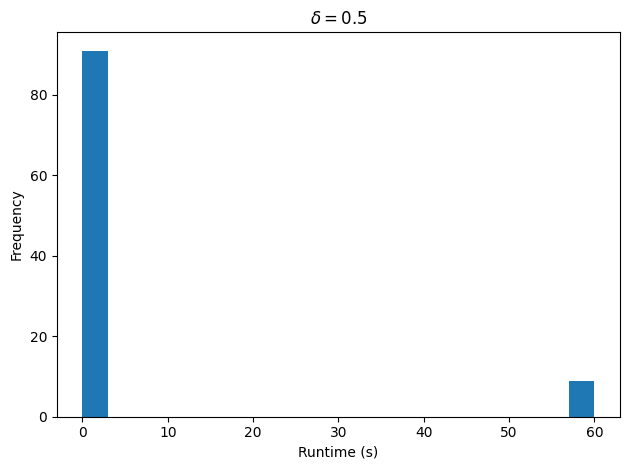

In [57]:
plot_gurobi_runtime_histogram("experiment_results_delta50.json", bins=20)

In [58]:
def plot_gurobi_runtime_histogram(json_path: str, bins: int = 20):
    """
    JSONファイルからGurobiのruntime値を抽出し、ヒストグラムを表示します。

    Args:
        json_path (str): 実験結果が保存されたJSONファイルのパス
        bins (int): ヒストグラムのビン数（デフォルト: 20）
    """
    # JSONを読み込む
    with open(json_path, 'r') as f:
        results = json.load(f)
    
    # runtimeのリストを作成
    runtimes = [
        exp.get("gurobi_qcqp_result", {}).get("runtime")
        for exp in results
        if exp.get("gurobi_qcqp_result", {}).get("runtime") is not None
    ]
    
    # ヒストグラムを描画
    plt.figure()
    plt.hist(runtimes, bins=bins)
    plt.xlabel("Runtime (s)")
    plt.ylabel("Frequency")
    plt.title(r"$\delta = 0.75$")
    plt.tight_layout()
    plt.show()

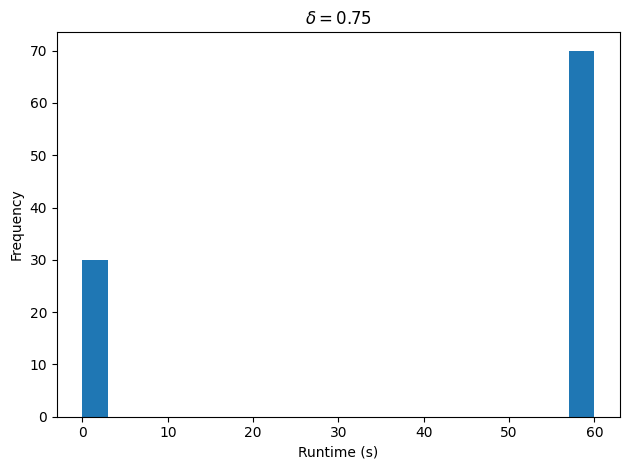

In [59]:
plot_gurobi_runtime_histogram("experiment_results_delta75.json", bins=20)